# Usage examples

In [1]:
# only needed because this notebook is inside the analysis_utils folder,
# you won't need this when adding analysis_utils as module to your project
import sys
sys.path.append('..')

In [2]:
from matplotlib import pyplot as plt
from IPython.display import display, Latex
%matplotlib inline
#%matplotlib widget

In [3]:
from analysis_utils.data import *
from analysis_utils.fitting import *
from analysis_utils.plotting import *

### ⚠️ Disclaimer
The examples given below are not complete. Use the auto-completion and docstring feature of Jupyter notebook to discover all available properties and get more information! (hint: type 'data.' and then press tab)

## IPM: Ionisation Profile Monitor

In [4]:
data = IPMData.from_file('test/ipmData_SIS1809_example.tgz', clean=False)

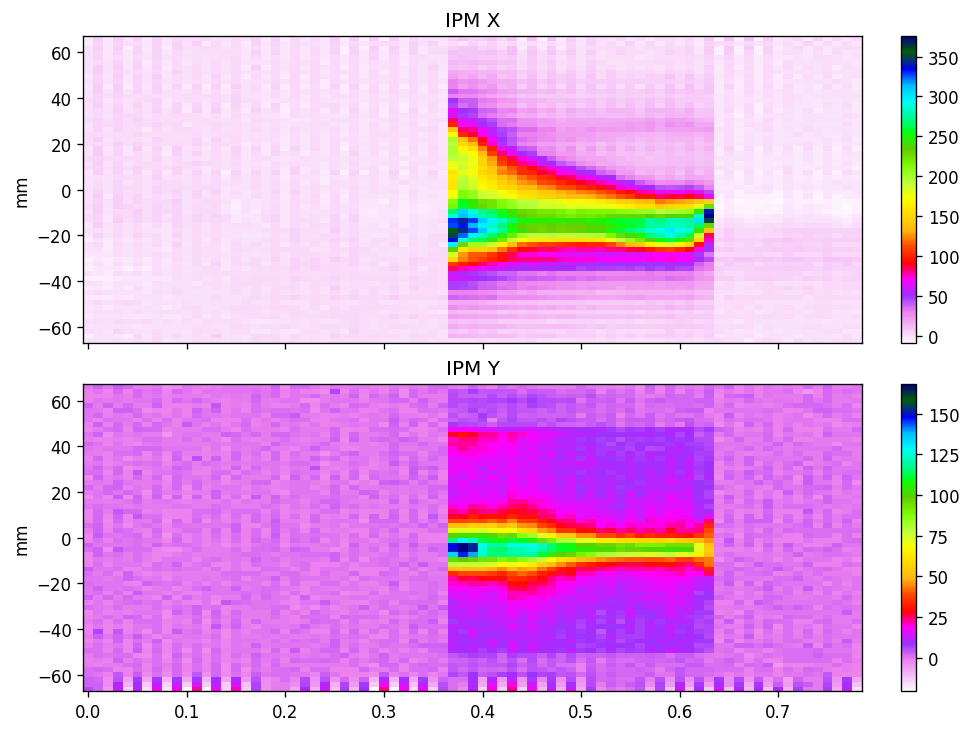

In [5]:
# plotting example
fig, ax = plt.subplots(2,1, sharex='col', figsize=(8,6), constrained_layout=True)

cm = ax[0].pcolormesh(data.t, data.w, data.x.T, cmap='gist_ncar_r')
ax[0].set(title='IPM X', ylabel=data.w_unit)
fig.colorbar(cm, ax=ax[0])
cm = ax[1].pcolormesh(data.t, data.w, data.y.T, cmap='gist_ncar_r')
ax[1].set(title='IPM Y', ylabel=data.w_unit)
fig.colorbar(cm, ax=ax[1])

## Lassie

In [6]:
...

Ellipsis

## Libera Hadron Beam Position Monitor

In [13]:
data = LiberaBBBData.from_file(f'test/example_sdlibera223_bpm2_bbb.bin').to_tbt_data(h=2)

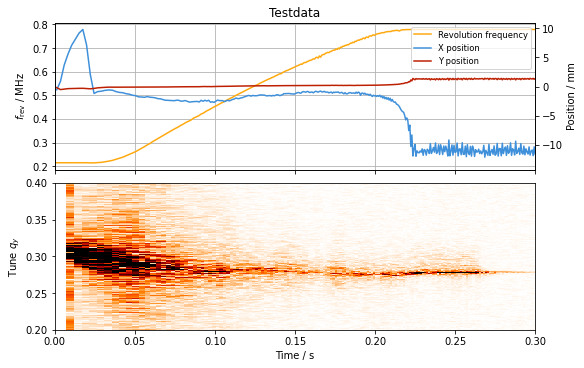

In [14]:
fig, ax = plt.subplots(2,1, sharex='col', figsize=(8,5))

# turn-by-turn beam position
plot_tbt(ax[0], data, 'fxy')
ax[0].grid()

# tune spectrogram
s = plot_tune_spectrogram(ax[1], data, 'y', turn_range=(0, 250000), tune_range=(0.2,0.4))

# plot layout
ax[0].set_title('Testdata')
ax[-1].set(xlim=(0, 0.3))
subplot_shared_labels(np.array([ax]).T)


<IPython.core.display.Latex object>

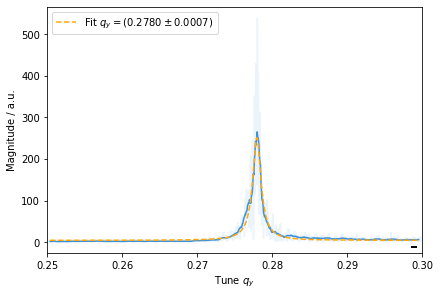

In [38]:
fig, ax = plt.subplots()
q = plot_tune_spectrum(ax, data, 'y', time_range=(.22, .25), tune_range=(0.25,0.3), fit=fit_lorenzian, smoothing=20)
ax.legend()

Latex(f'Figure: Spectrum of transverse betatron oscillations yielding a tune of $ q_y = {q:~L} $. The black bar indicates the averaging window applied.')

## Micro Spill TDC
Spill data from time-to-digital converter (TDC) application

In [4]:
data = TDCData.from_file('test/example_tdc_data.dat')
data

TDCData(spills=TDCSpill(HHDDI1P, length=0.0159997s, counts=0)
               TDCSpill(HHDDI1P, length=1.99997s, counts=132965)
               TDCSpill(HHDDI1P, length=0.0159997s, counts=0)
               TDCSpill(HHDDI1P, length=1.99997s, counts=115562))

In [5]:
# access spills (machine cycles)
spill = data.spills[1]
spill

TDCSpill(HHDDI1P, length=1.99997s, counts=132965)

In [6]:
# access data
print('Spill length:', spill.length, 's')
print('Particle hits:', spill.counts)
print('Mean RF frequency:', 1/spill.rf_period('mean'), 'Hz')
...

spill.hittimes # timestamps of particle hits (in s)

Spill length: 1.999969192101894 s
Particle hits: 132965
Mean RF frequency: 4524324.563999204 Hz


array([0.0397024 , 0.04001405, 0.0403357 , ..., 1.99185504, 1.99684589,
       1.99905983])

In [7]:
# simple method for subdividing spill into time slices (segments)
for t, s in spill.segments(3, t_stop=1.5):
    # s is also a spill object
    print(f'Hits in slice t = {t[0]:.2f}..{t[1]:.2f} s: {s.counts}')

Hits in slice t = 0.00..0.50 s: 60211
Hits in slice t = 0.50..1.00 s: 40135
Hits in slice t = 1.00..1.50 s: 18442


### Plotting TDC data

In [8]:
# Parameters for duty factor evaluation
counting_dt = 50e-6 # chosen such that we have 5-10 particles per bin (avg extr. rate 1e5/s)
evaluation_dt = 50e-3 # chosen such that larger values don't change duty factor (and > 2e-2 to consider 50Hz ripples)

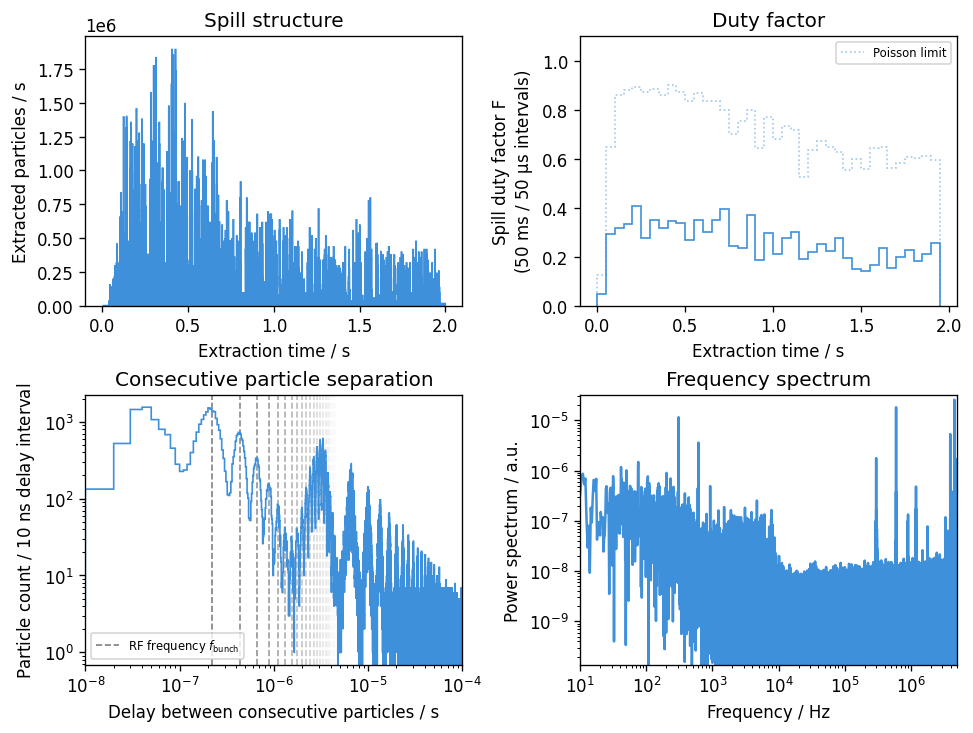

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,6), constrained_layout=True)

ax1.set(title='Spill structure')
plot_spill_intensity(ax1, spill, counting_dt, rate=1)

ax2.set(title='Duty factor')
plot_spill_duty_factor(ax2, spill, counting_dt=counting_dt, evaluation_dt=evaluation_dt, show_poisson_limit=True)
ax2.legend()

ax3.set(title='Consecutive particle separation', xscale='log', yscale='log')
plot_spill_consecutive_particle_delay(ax3, spill, 1e-4, resolution=1e-08)
plot_harmonics(ax3, spill.rf_period('mean'), ls='--', label='RF frequency $f_\\mathrm{bunch}$')
ax3.legend(loc='lower left')

ax4.set(title='Frequency spectrum', xlim=(10, 5e6), xscale='log')
plot_spill_frequency_spectrum(ax4, spill, 5e6)

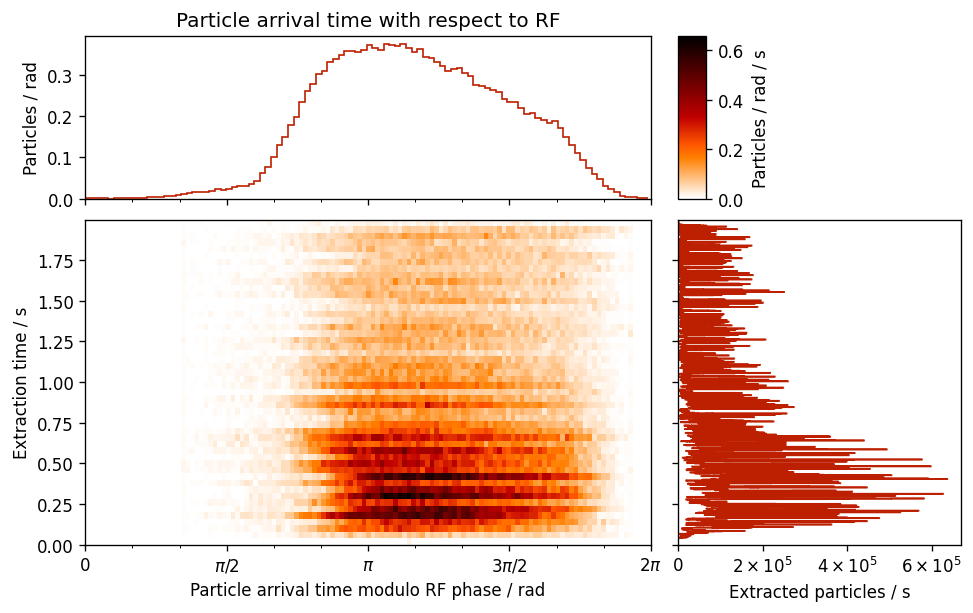

In [12]:
fig, ((axt, ax_), (ax, axr)) = fig, axes = plt.subplots(2,2, sharex='col', sharey='row', gridspec_kw=dict(width_ratios=(2,1), height_ratios=(1,2)), constrained_layout=True)
ax_.axis('off')
axt.set(title='Particle arrival time with respect to RF')

# full spill (1D histogram)
plot_spill_rf_correlation(axt, spill, color=petroff_colors[2])

# as function of extraction time, divided in 50 segments --> 2D color plot
plot_spill_rf_correlation(ax, spill, segments=50, colorbar=dict(cax=ax_.inset_axes((0,0,.1,1))))

# spill intensity
#plot_spill_intensity(axr, spill, cumulative=True, swap_axis=True, color='k', zorder=10)
plot_spill_intensity(axr, spill, bin_time=1e-03, rate=True, swap_axis=True, color=petroff_colors[2])
axr.xaxis.set_major_formatter(mpl.ticker.LogFormatterSciNotation(minor_thresholds=(np.inf,np.inf)))

subplot_shared_labels(axes)

## NWA: Vector Network Analyzer

In [12]:
# data = NWAData.from_file('magnitude.csv', 'phase.csv'],
#                          isdeg=True, unwrap=True)
# data.m_unit = 'dB'
# plot_btf(ax1, ax2, data,
#          frev=854e3
# )